In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_6188\3535740998.py", line 4, in <module>
    import seaborn as sns
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\__init__.py", line 5, in <module>
    from .relational import *  # noqa: F401,F403
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\relational.py", line 29, in <module>
    _relational_narrative = DocstringComponents(dict(
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_docstrings.py", line 15, in __init__
    m = re.match(self.regexp, val)
  File "c:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\re.py", line 191, in match
    return _compile(pattern, flags).match(string)


In [48]:
# Đọc dữ liệu
df = pd.read_csv("/content/data.csv")

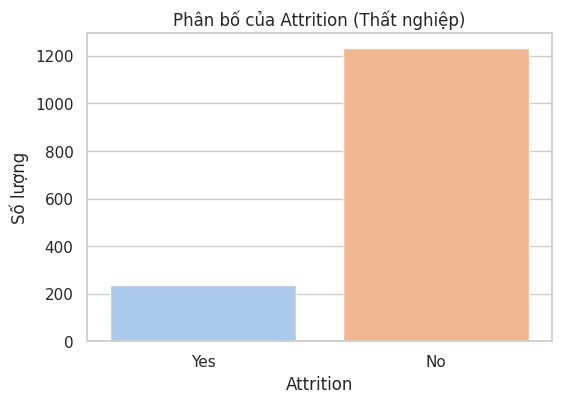

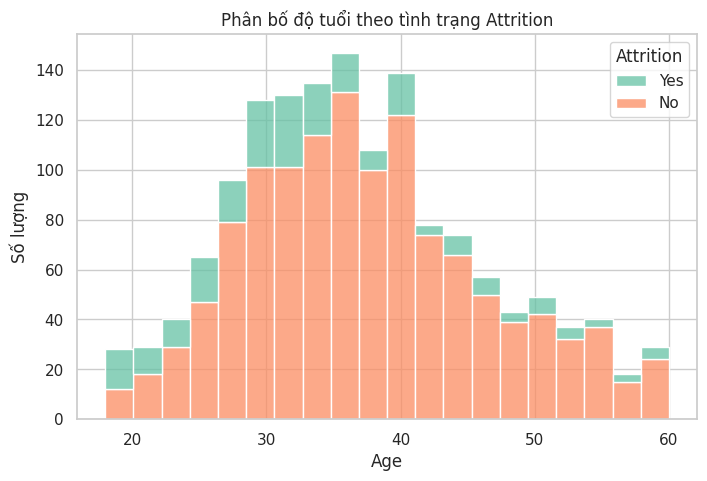

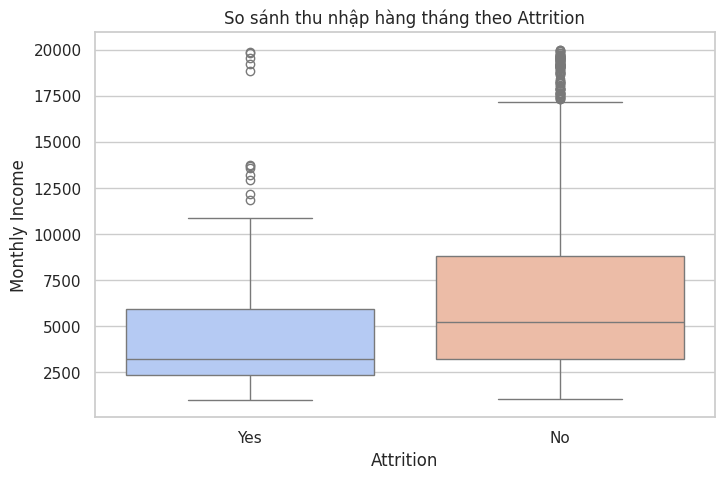

In [49]:
# Trực quan hóa dữ liệu
# Cài đặt kiểu cho biểu đồ
sns.set(style="whitegrid")

# Biểu đồ phân bố Attrition
plt.figure(figsize=(6,4))
sns.countplot(x="Attrition", data=df, hue="Attrition", palette="pastel", legend=False)
plt.title("Phân bố của Attrition (Thất nghiệp)")
plt.xlabel("Attrition")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ phân bố độ tuổi theo Attrition
plt.figure(figsize=(8,5))
sns.histplot(df, x="Age", hue="Attrition", multiple="stack", bins=20, palette="Set2")
plt.title("Phân bố độ tuổi theo tình trạng Attrition")
plt.xlabel("Age")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ hộp so sánh thu nhập theo Attrition
plt.figure(figsize=(8,5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df, hue="Attrition", palette="coolwarm", dodge=False)
plt.title("So sánh thu nhập hàng tháng theo Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

In [50]:
# Xóa các cột không cần thiết
df.drop(columns=["EmployeeCount", "EmployeeNumber", "StandardHours", "Over18"], inplace=True)

# Kiểm tra và xử lý missing values
df.dropna(inplace=True)  # Loại bỏ các dòng có giá trị thiếu

# Loại bỏ dữ liệu trùng lặp
df.drop_duplicates(inplace=True)

# Kiểm tra và chuyển đổi kiểu dữ liệu phù hợp
df = df.convert_dtypes()

# Xử lý outliers bằng IQR
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df

df = remove_outliers(df, df.select_dtypes(include=['int64', 'float64']).columns)

In [51]:
# Mã hóa biến mục tiêu
le_attrition = LabelEncoder()
df["Attrition"] = le_attrition.fit_transform(df["Attrition"])

# Mã hóa các biến phân loại
categorical_cols = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", "OverTime"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [52]:
# Chuẩn hóa dữ liệu số
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop("Attrition")
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Chia tập dữ liệu
X = df.drop(columns=["Attrition"])
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [55]:
# Callback để tránh overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3397 - loss: 0.9108 - val_accuracy: 0.8077 - val_loss: 0.5420
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 0.5085 - val_accuracy: 0.8205 - val_loss: 0.4777
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8403 - loss: 0.4089 - val_accuracy: 0.8205 - val_loss: 0.4520
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8248 - loss: 0.4111 - val_accuracy: 0.8141 - val_loss: 0.4325
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8103 - loss: 0.4104 - val_accuracy: 0.8141 - val_loss: 0.4278
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8533 - loss: 0.3399 - val_accuracy: 0.8269 - val_loss: 0.4175
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8545 - loss: 0.3707 - val_accuracy: 0.8333 - val_loss: 0.4128
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8716 - loss: 0.3562 - val_accuracy: 0.8397 - val_loss:

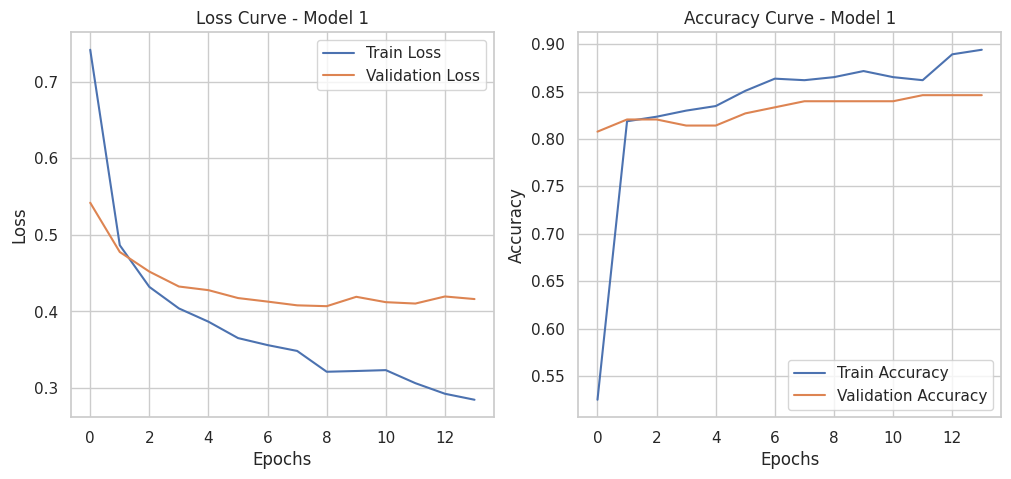

In [62]:
# Xây dựng mô hình ANN
# Mô hình 1 với Dropout
model_1 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_1 = model_1.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Đánh giá mô hình
loss, accuracy = model_1.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

# Vẽ biểu đồ loss và accuracy cho model_1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve - Model 1')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Train Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve - Model 1')
plt.show()

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8025 - loss: 0.5187 - val_accuracy: 0.8205 - val_loss: 0.4376
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8366 - loss: 0.4458 - val_accuracy: 0.8205 - val_loss: 0.4202
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8248 - loss: 0.4020 - val_accuracy: 0.8205 - val_loss: 0.4023
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8111 - loss: 0.4585 - val_accuracy: 0.8333 - val_loss: 0.3953
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8248 - loss: 0.3936 - val_accuracy: 0.8333 - val_loss: 0.3924
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.3335 - val_accuracy: 0.8462 - val_loss: 0.3938
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8797 - loss: 0.3223 - val_accuracy: 0.8718 - val_loss: 0.3958
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8612 - loss: 0.3137 - val_accuracy: 0.8526 - val_l

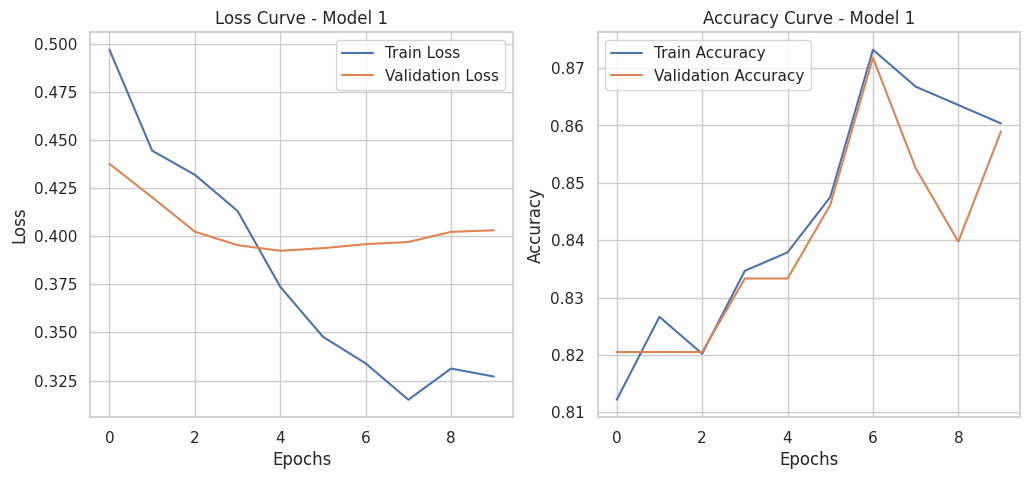

In [63]:
# Mô hình thứ hai với nhiều lớp hơn và Dropout
model_2 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_2 = model_2.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Đánh giá mô hình
loss, accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

# Vẽ biểu đồ loss và accuracy cho model_1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve - Model 1')

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve - Model 1')
plt.show()

Epoch 1/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5437 - loss: 0.7411 - val_accuracy: 0.7308 - val_loss: 0.5772
Epoch 2/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7363 - loss: 0.5663 - val_accuracy: 0.7821 - val_loss: 0.4982
Epoch 3/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8022 - loss: 0.4828 - val_accuracy: 0.8141 - val_loss: 0.4366
Epoch 4/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8390 - loss: 0.4122 - val_accuracy: 0.8397 - val_loss: 0.3989
Epoch 5/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8547 - loss: 0.3744 - val_accuracy: 0.8654 - val_loss: 0.3784
Epoch 6/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8562 - loss: 0.3366 - val_accuracy: 0.8782 - val_loss: 0.3780
Epoch 7/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8578 - loss: 0.3562 - val_accuracy: 0.8590 - val_loss: 0.3735
Epoch 8/50
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8381 - loss: 0.3534 - val_accuracy: 0.8654 - val_loss:

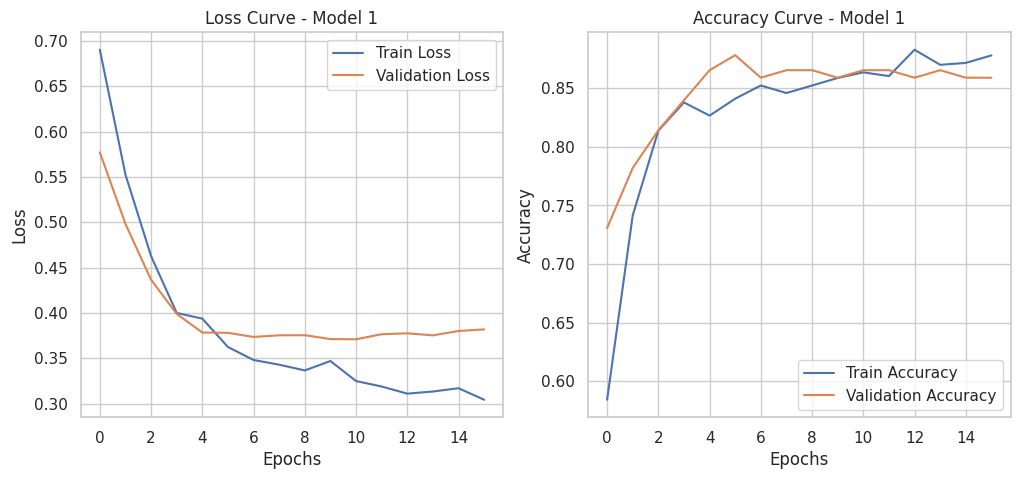

In [64]:
# Mô hình thứ ba với hàm kích hoạt khác và Dropout
model_3 = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='tanh'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile mô hình
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình
history_3 = model_3.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

# Đánh giá mô hình
loss, accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print(f"Accuracy trên tập kiểm tra: {accuracy:.4f}")

# Vẽ biểu đồ loss và accuracy cho model_1
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve - Model 1')

plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'], label='Train Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve - Model 1')
plt.show()

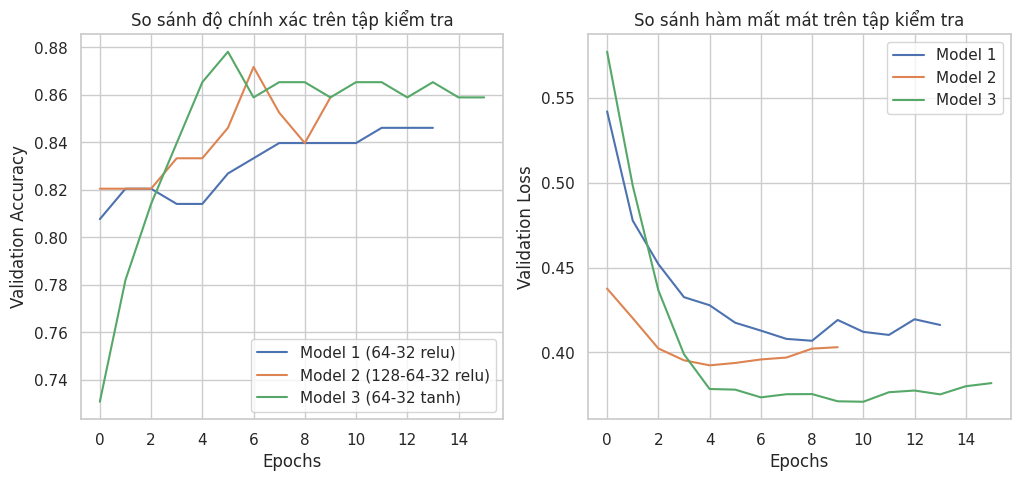

In [65]:
# So sánh kết quả
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['val_accuracy'], label='Model 1 (64-32 relu)')
plt.plot(history_2.history['val_accuracy'], label='Model 2 (128-64-32 relu)')
plt.plot(history_3.history['val_accuracy'], label='Model 3 (64-32 tanh)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('So sánh độ chính xác trên tập kiểm tra')

plt.subplot(1, 2, 2)
plt.plot(history_1.history['val_loss'], label='Model 1')
plt.plot(history_2.history['val_loss'], label='Model 2')
plt.plot(history_3.history['val_loss'], label='Model 3')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('So sánh hàm mất mát trên tập kiểm tra')
plt.show()